# Proyecto Tutorial K-Means

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix
from pickle import dump

In [4]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
total_data = pd.read_csv(url, sep = ",")
total_data.to_csv("/workspaces/kmeans/data/raw/housing.csv", index = False)

In [5]:
total_data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [6]:
# Eliminamos columnas que no nos interesan
total_data.drop(['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'], axis = 1, inplace = True)

In [7]:
total_data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [8]:
#train y test

X = total_data

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 17)

# K-Means

In [9]:
#KMeans model clasificando los datos en 6 clusters
model = KMeans(n_clusters = 6, random_state = 24)
model.fit(X_train)

#Guardamos
dump(model, open("/workspaces/kmeans/models/K_means_model.pk", "wb"))

In [10]:
# agrupamiento cluster TRAIN
cluster_train = model.predict(X_train)

#agregamos el cluster
X_train["Cluster"] = cluster_train

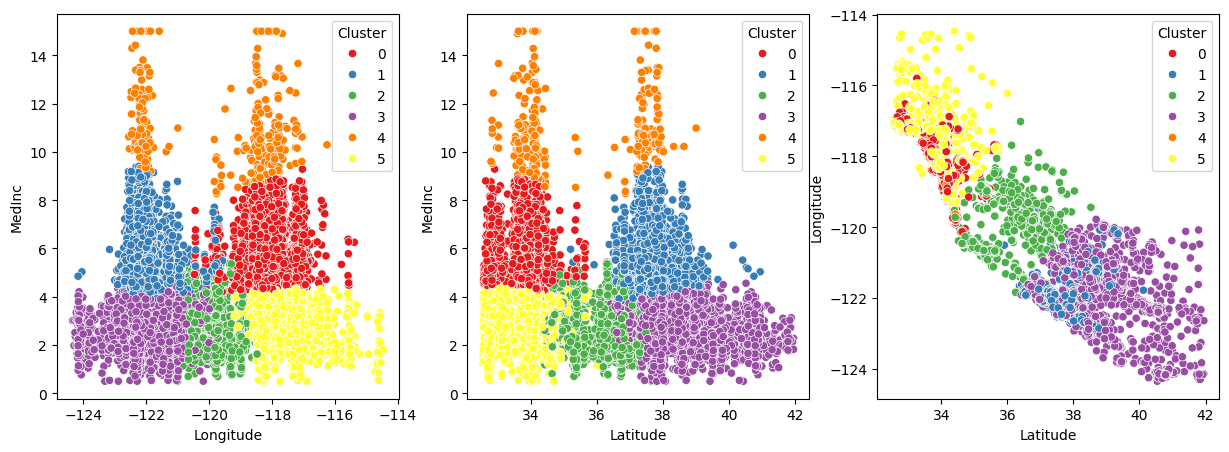

In [11]:
fig, axis = plt.subplots(1, 3, figsize = (15,5))

sns.scatterplot(ax = axis[0], data = X_train, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1], data = X_train, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[2], data = X_train, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')

plt.show()

In [12]:
# agrupamiento cluster Test
cluster_test = model.predict(X_test)

# Añadimos cluster al test
X_test["Cluster"] = cluster_test

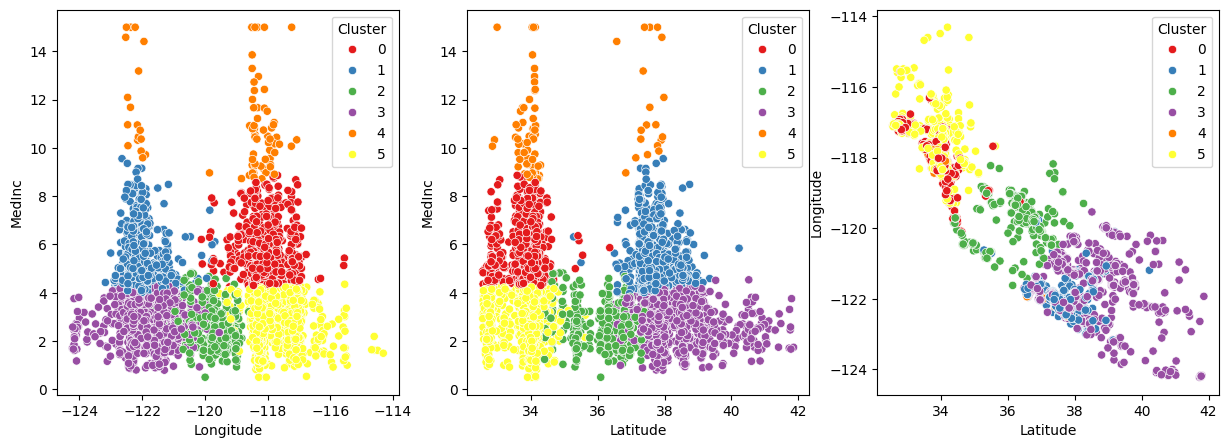

In [13]:
fig, axis = plt.subplots(1, 3, figsize = (15,5))

sns.scatterplot(ax = axis[0], data = X_test, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1], data = X_test, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[2], data = X_test, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')

plt.show()

## KNN

In [14]:
#separamos la target de X_train
y_train = X_train["Cluster"]
X_train.drop("Cluster", axis=1, inplace = True)

#separamos la target de X_test
y_test = X_test["Cluster"]
X_test.drop("Cluster", axis=1, inplace = True)

# Save data

X_train.to_csv("/workspaces/kmeans/data/processed/x_train.csv", index = False)
y_train.to_csv("/workspaces/kmeans/data/processed/y_train.csv", index = False)

X_test.to_csv("/workspaces/kmeans/data/processed/x_test.csv", index = False)
X_test.to_csv("/workspaces/kmeans/data/processed/y_test.csv", index = False)

In [16]:
#modelo KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)

dump(model, open("/workspaces/kmeans/models/KNN_model.pk", "wb"))

In [17]:
#train
y_pred_train = model.predict(X_train)
y_pred_train

array([3, 3, 1, ..., 5, 2, 5], dtype=int32)

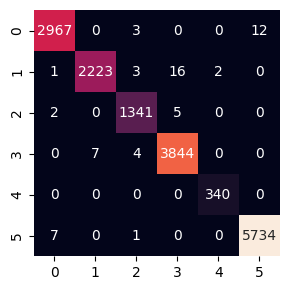

In [18]:
#Matriz de confusion en KNN TRAIN
california_cm = confusion_matrix(y_train, y_pred_train)

cm_df = pd.DataFrame(california_cm)

plt.figure(figsize = (3, 3))

sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [19]:
#TEST
y_pred = model.predict(X_test)
y_pred

array([1, 5, 3, ..., 5, 0, 2], dtype=int32)

In [20]:
print(f"La precisión de TRAIN es {accuracy_score(y_train, y_pred_train)}")
print(f"La precisión de TEST es {accuracy_score(y_test, y_pred)}")

La precisión de TRAIN es 0.9961845930232558
La precisión de TEST es 0.9917635658914729


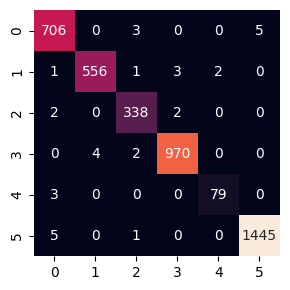

In [21]:
#Matriz de confusión del KNN TEST
california_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(california_cm)

plt.figure(figsize = (3, 3))

sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Regresión Logística

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

dump(model, open("/workspaces/kmeans/models/logistic_R_model.pk", "wb"))

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
y_pred_train = model.predict(X_train)
y_pred_train

array([2, 3, 1, ..., 5, 3, 5], dtype=int32)

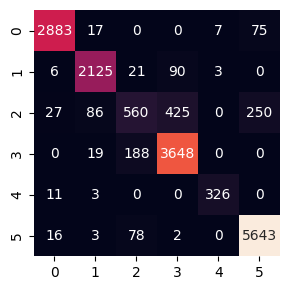

In [24]:
#Matriz de regresión logística TRAIN
california_cm = confusion_matrix(y_train, y_pred_train)

cm_df = pd.DataFrame(california_cm)

plt.figure(figsize = (3, 3))

sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [25]:
y_pred = model.predict(X_test)
y_pred

array([1, 5, 3, ..., 5, 0, 2], dtype=int32)

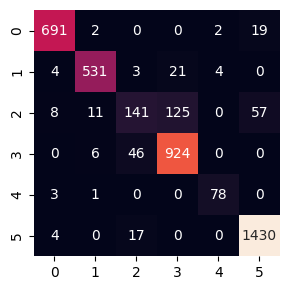

In [26]:
#Matriz de regresión logística TEST
california_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(california_cm)

plt.figure(figsize = (3, 3))

sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [27]:
print(f"La precisión de TRAIN es= {accuracy_score(y_train, y_pred_train)}")
print(f"La precisión de TEST es= {accuracy_score(y_test, y_pred)}")

La precisión de TRAIN es= 0.9196342054263565
La precisión de TEST es= 0.9193313953488372


# CONCLUSIÓN

El modelo K-Means nos ha proporcionado una estructura de agrupación útil para entender la distribución de los datos. Tras comparar con modelos supervisados como KNN y Regresión Logística, se concluye que KNN tuvo un rendimiento superior en precisión, con un 99.61% en TRAIN y un 99.17% en el de TEST, con respecto al Modelo de Regresion Logística que ha tenido una precision del 91,96% en el Train y un 91,93% en el Test. Aunque K-Means ofrece información sobre la estructura de los datos, KNN demostró ser más preciso en esta tarea de clasificación específica.